In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(__doc__)
from rootpy.plotting import histogram, Canvas
from rootpy.interactive import wait
import time

import ROOT
import numpy as np

ROOT.gStyle.SetOptStat(0)


class Timer(object):
    def __enter__(self):
        self.__start = time.time()

    def __exit__(self, type, value, traceback):
        self.__finish = time.time()

    def duration_in_seconds(self):
        return self.__finish - self.__start


data0 = "normal_small", np.random.normal(0.5, 1, 200)
data1 = "normal", np.random.normal(0.5, 1, 100000)
data2 = "uniform", np.random.random(100000)
data3 = "normal+uniform", np.concatenate((data1[1], 10 * data2[1]))
data4 = "normal+normal", np.concatenate((data1[1], np.random.normal(2.5, 0.1, 100000)))

if ROOT.gROOT.IsBatch():
    datas = (data0, data1)
else:
    datas = (data0, data1, data2, data3, data4)

recipes = (
    "manual1", "sturges", "sturges-doane", "scott", "sqrt",
    "doane", "freedman-diaconis", "risk", "knuth")
objs = []
canvas = Canvas()
canvas.Divide(len(recipes), len(datas), 1E-3, 1E-3)
print('-' * 57)
print('\t\t{0:<20s}{1:>10s}   {2:<6s}'.format('method', 'bins', 'time [s]'))
print('-' * 57)
for id, (dataname, d) in enumerate(datas):
    print(dataname)
    for ir, r in enumerate(recipes):
        canvas.cd(id * len(recipes) + ir + 1)
        timer = Timer()
        if r == "manual1":
            with timer:
                bins, h = histogram(d, 50, np.min(d), np.max(d),
                                    drawstyle='hist')
        else:
            with timer:
                bins, h = histogram(d, binning=r, drawstyle='hist')
        print('\t\t{0:<20s}{1:>10d}   {2:<6.2f}'.format(
            r, h.GetNbinsX(), timer.duration_in_seconds()))
        h.Draw()
        h.GetYaxis().SetRangeUser(0, h.GetMaximum() * 1.2)
        l = ROOT.TLatex(0.15, 0.8, "{0}: {1:d}".format(r, h.GetNbinsX()))
        l.SetNDC()
        l.SetTextSize(0.1)
        l.Draw()
        canvas.Update()

wait()

Automatically created module for IPython interactive environment


Welcome to ROOTaaS 6.06/04
---------------------------------------------------------
		method                    bins   time [s]
---------------------------------------------------------
normal_small
		manual1                     50   0.07  
		sturges                      9   0.00  
		sturges-doane               21   0.00  
		scott                        9   0.00  
		sqrt                        15   0.00  
		doane                        9   0.22  
		freedman-diaconis           12   0.00  
		risk                        14   0.01  
		knuth                       15   0.01  
normal
		manual1                     50   0.06  
		sturges                     18   0.05  
		sturges-doane               87   0.06  
		scott                      113   0.06  
		sqrt                       317   0.06  
		doane                       19   0.06  
		freedman-diaconis          147   0.06  
		risk                       295   0.70  
		knuth                      253   0.54  


In [3]:
print(__doc__)
from rootpy.extern.six.moves import range
from rootpy.plotting import Hist, Hist2D, Hist3D, HistStack, Legend, Canvas
from rootpy.interactive import wait
import random

# create a simple 1D histogram with 10 constant-width bins between 0 and 1
h_simple = Hist(10, 0, 1)
print(h_simple.name)

# If the name is not specified, a UUID is used so that ROOT never complains
# about two histograms having the same name.
# Alternatively you can specify the name (and the title or any other style
# attributes) in the constructor:
h_simple = Hist(10, -4, 12, name='my hist', title='Some Data',
                drawstyle='hist',
                legendstyle='F',
                fillstyle='/')

# fill the histogram
for i in range(1000):
    # all ROOT CamelCase methods are aliased by equivalent snake_case methods
    # so you can call fill() instead of Fill()
    h_simple.Fill(random.gauss(4, 3))

# easily set visual attributes
h_simple.linecolor = 'blue'
h_simple.fillcolor = 'green'
h_simple.fillstyle = '/'

# attributes may be accessed in the same way
print(h_simple.name)
print(h_simple.title)
print(h_simple.markersize)

# plot
canvas = Canvas(width=700, height=500)
canvas.SetLeftMargin(0.15)
canvas.SetBottomMargin(0.15)
canvas.SetTopMargin(0.10)
canvas.SetRightMargin(0.05)
h_simple.Draw()

# create the legend
legend = Legend([h_simple], pad=canvas,
                header='Header',
                leftmargin=0.05,
                rightmargin=0.5)
legend.Draw()

# 2D and 3D histograms are handled in the same way
# the constructor arguments are repetitions of #bins, left bound, right bound.
h2d = Hist2D(10, 0, 1, 50, -40, 10, name='2d hist')
h3d = Hist3D(3, -1, 4, 10, -1000, -200, 2, 0, 1, name='3d hist')

# variable-width bins may be created by passing the bin edges directly:
h1d_variable = Hist([1, 4, 10, 100])
h2d_variable = Hist2D([2, 4, 7, 100, 200], [-100, -50, 0, 10, 20])
h3d_variable = Hist3D([1, 3, 10], [20, 50, 100], [-10, -5, 10, 20])

# variable-width and constant-width bins can be mixed:
h2d_mixed = Hist2D([2, 10, 30], 10, 1, 5)

# wait for you to close all open canvases before exiting
# wait() will have no effect if ROOT is in batch mode:
# ROOT.gROOT.SetBatch(True)
wait()


Automatically created module for IPython interactive environment
Hist_AKzfenuPGJQZgAGJdptwvR
my hist
Some Data
1.0


INFO:rootpy.plotting.style] using ROOT style 'ATLAS'
INFO:rootpy.plotting.style] using matplotlib style 'ATLAS'


Automatically created module for IPython interactive environment


/sps/lsst/dev/dagoret/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


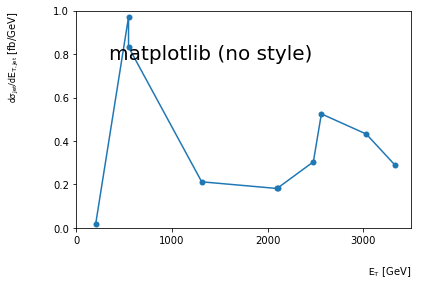

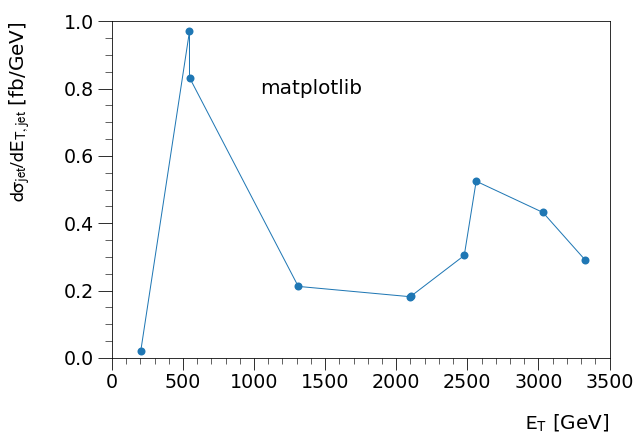

In [4]:
print(__doc__)
import ROOT
import numpy as np
from rootpy.plotting import Canvas, Graph
from rootpy.plotting.style import get_style, set_style
from rootpy.interactive import wait
import rootpy.plotting.root2matplotlib as rplt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# set the random seed
ROOT.gRandom.SetSeed(42)
np.random.seed(42)

# points
x = np.sort(np.random.random(10)) * 3500
y = np.random.random(10)

# set style for ROOT
set_style('ATLAS')

# create graph
graph = Graph(x.shape[0])
for i, (xx, yy) in enumerate(zip(x, y)):
    graph.SetPoint(i, xx, yy)

# set visual attributes
graph.linecolor = 'blue'
graph.markercolor = 'blue'
graph.xaxis.SetTitle("E_{T} [GeV]")
graph.yaxis.SetTitle("d#sigma_{jet}/dE_{T,jet} [fb/GeV]")
graph.xaxis.SetRangeUser(0, 3500)
graph.yaxis.SetRangeUser(0, 1)

# plot with ROOT
canvas = Canvas()
graph.Draw("APL")

label = ROOT.TText(0.4, 0.8, "ROOT")
label.SetTextFont(43)
label.SetTextSize(25)
label.SetNDC()
label.Draw()
canvas.Modified()
canvas.Update()

# plot with matplotlib

def plot_with_matplotlib():
    fig, axes = plt.subplots()

    axes.plot(x, y, 'o-', markeredgewidth=0)
    axes.set_xlabel(r"$E_T$ [GeV]",
                    horizontalalignment="right", x=1, labelpad=20)
    axes.set_ylabel(r"$d\sigma_{jet}/dE_{T,jet}$ [fb/GeV]",
                    horizontalalignment="right", y=1, labelpad=32)
    axes.set_xlim(0, 3500)
    axes.set_ylim(0, 1)

    return fig, axes

# plot without style
fig1, axes1 = plot_with_matplotlib()
axes1.text(0.4, 0.8, 'matplotlib (no style)',
           verticalalignment='center', horizontalalignment='center',
           transform=axes1.transAxes, fontsize=20)

# plot with ATLAS style
set_style('ATLAS', mpl=True)
fig2, axes2 = plot_with_matplotlib()
axes2.text(0.4, 0.8, 'matplotlib',
           verticalalignment='center', horizontalalignment='center',
           transform=axes2.transAxes, fontsize=20)
axes2.xaxis.set_minor_locator(AutoMinorLocator())
axes2.yaxis.set_minor_locator(AutoMinorLocator())

if not ROOT.gROOT.IsBatch():
    plt.show()

# wait for you to close the canvas before exiting
wait(True)